In [26]:
## IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

QUESTION THREE

In [27]:
### iMPORTING MY DATA SET
df = pd.read_csv("Test.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998.0,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985.0,Medium,Tier 3,Supermarket Type3


CHECKING FPR MISSING VALUES

In [28]:
## Checking for missing values by number
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 2
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       2
Outlet_Size                  1606
Outlet_Location_Type            2
Outlet_Type                     5
dtype: int64

In [29]:
## Checking for missing values by percentage
(df.isna().sum() /len(df)) * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.035205
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.035205
Outlet_Size                  28.269671
Outlet_Location_Type          0.035205
Outlet_Type                   0.088013
dtype: float64

## Handling missing values

<Axes: ylabel='Item_Weight'>

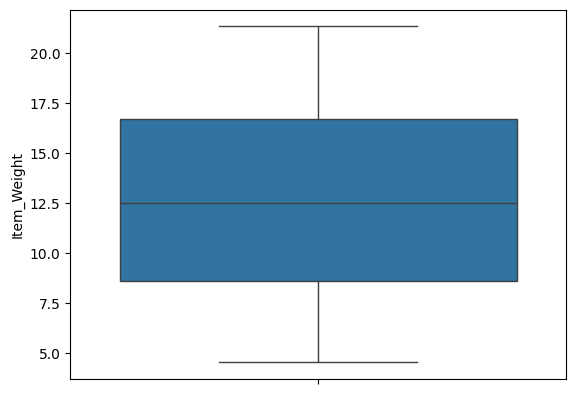

In [30]:
## Visaulise our data
# Variable Item_Weight
sns.boxplot(df["Item_Weight"])

In [31]:
## Since Item_Weight is normally distributed we shall impute with mean
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

## Check the missing values
df["Item_Weight"].isna().sum()

np.int64(0)

<Axes: ylabel='Item_Visibility'>

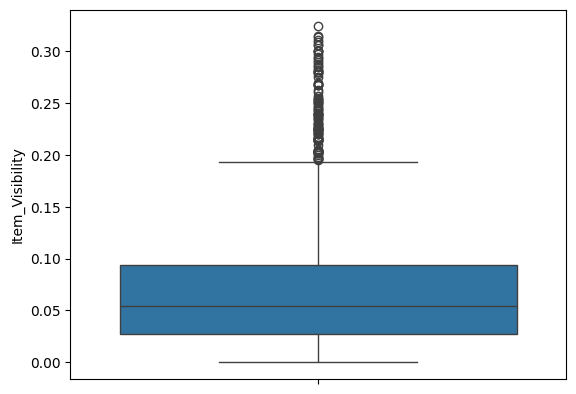

In [32]:
## Missing values in item visibility
sns.boxplot(df["Item_Visibility"])

In [33]:
## We impute with median since it is not normally distributed
df['Item_Visibility'] = df['Item_Visibility'].fillna(df['Item_Visibility'].median())

## Check the missing values
df['Item_Visibility'].isna().sum()

np.int64(0)

In [34]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [35]:
## In outlet established year we shall use forward fill or backward fill
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].ffill()

## Check the missing values
df['Outlet_Establishment_Year'].isna().sum()

np.int64(0)

In [36]:
## For Outlet_Size,Outlet_Location_Type and Outlet_Type  we shall impute with mode since they are categorical variables
df[["Outlet_Size","Outlet_Location_Type","Outlet_Type"]] = df[["Outlet_Size","Outlet_Location_Type","Outlet_Type"]].fillna(df[["Outlet_Size","Outlet_Location_Type","Outlet_Type"]].mode().iloc[0])

In [37]:
### Check for missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### OUTLIERS

Question three, 2

In [38]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## Univariate analysis

Is the type of analysis performed on a single variable and is done to find out the distribution of data of a given variable

<Axes: ylabel='Item_Weight'>

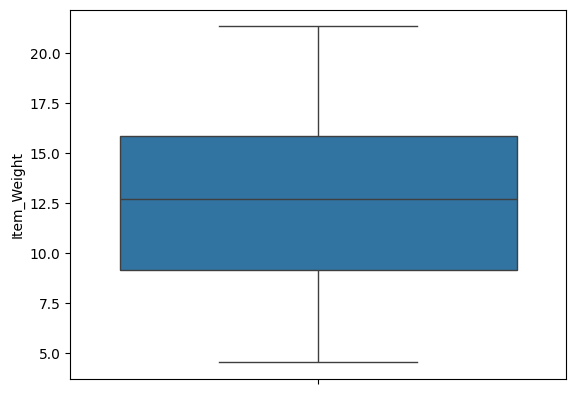

In [39]:

# I will use a boxplot and a count plot to analyse variables Item_Weight and also outlet size

# Item weight
sns.boxplot(data=df,y="Item_Weight")


<Axes: xlabel='Outlet_Size', ylabel='count'>

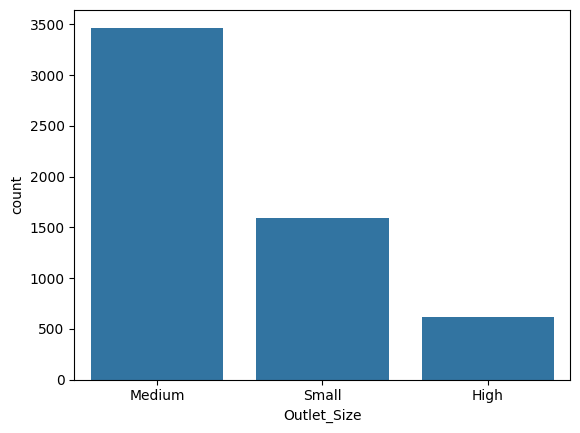

In [40]:
# COUNTPLOT FOR OUTLET SIZE
sns.countplot(data=df,x="Outlet_Size")

# From the plot we see that the Medium is the highest followed by small and and High is the last or smallest

## Bivariate analysis

Is the type of analysis that involves exactly two variables and is used to establish the relationship between the two variables

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

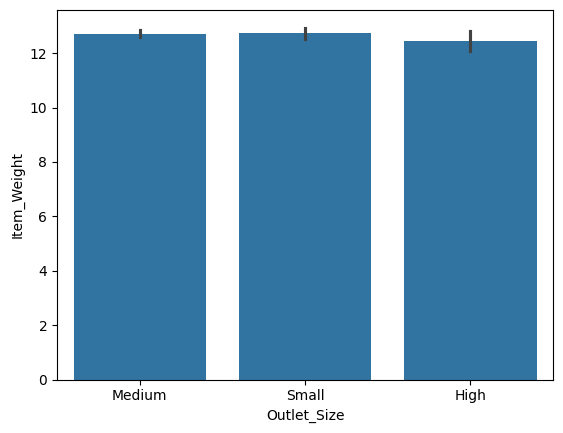

In [41]:
## Using a bar chart to see the relationship between outlet size and item weight
sns.barplot(data=df,x="Outlet_Size",y='Item_Weight')

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

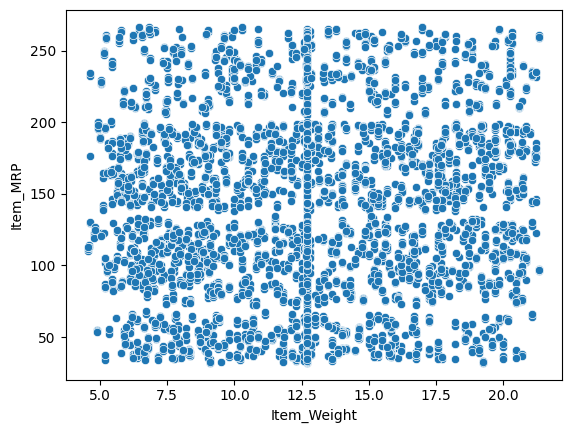

In [42]:
## We can use a scatter plot to show the relationship between item weight and Item_MRP
sns.scatterplot(data=df,x="Item_Weight",y="Item_MRP")

# Multivariate analysis

Is a type of data analysis that involves the analysis of more than two variables in order to identify and understand the different complex relationship between them

In [43]:
## We shall use a heat map to see the different relationships between our numeric variables
cont_df = df.select_dtypes(include=["int64","float64"])
cont_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999.0
1,8.300000,0.038428,87.3198,2007.0
2,14.600000,0.099575,241.7538,1998.0
3,7.315000,0.015388,155.0340,2007.0
4,12.695633,0.118599,234.2300,1985.0
...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997.0
5677,7.600000,0.142991,169.1448,2009.0
5678,10.000000,0.073529,118.7440,2002.0
5679,15.300000,0.000000,214.6218,2007.0


In [51]:
## WE FIRST CREATE A CORRELATION MATRIX THAT WE SHALL PASS IN OUR HEATMAP
corr = cont_df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016644,0.045257,0.013878
Item_Visibility,-0.016644,1.000000,-0.011188,-0.087628
Item_MRP,0.045257,-0.011188,1.000000,-0.007363
Outlet_Establishment_Year,0.013878,-0.087628,-0.007363,1.000000


<Axes: >

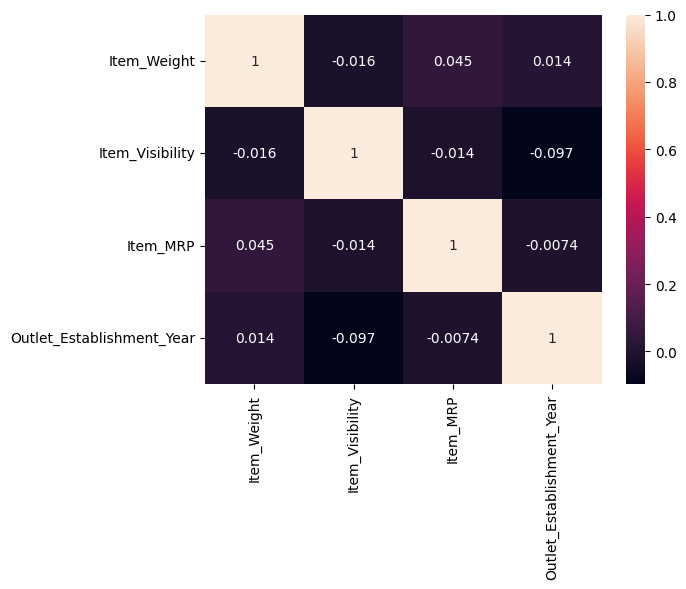

In [45]:
sns.heatmap(data=corr,annot=True)

## CHECKING AND HANDLING OUTLIERS

An outlier is a data point that deviates from the rest of the data

In [46]:
## We shall use to check for the outlier in our data using a boxplot
# But we shall use our continuous data cont_df that i created

def check_outlier(data):
    plt.figure(figsize=(10,10))
    for i, col in enumerate(data.columns):
        plt.subplot(2,2, i+1)
        sns.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()    

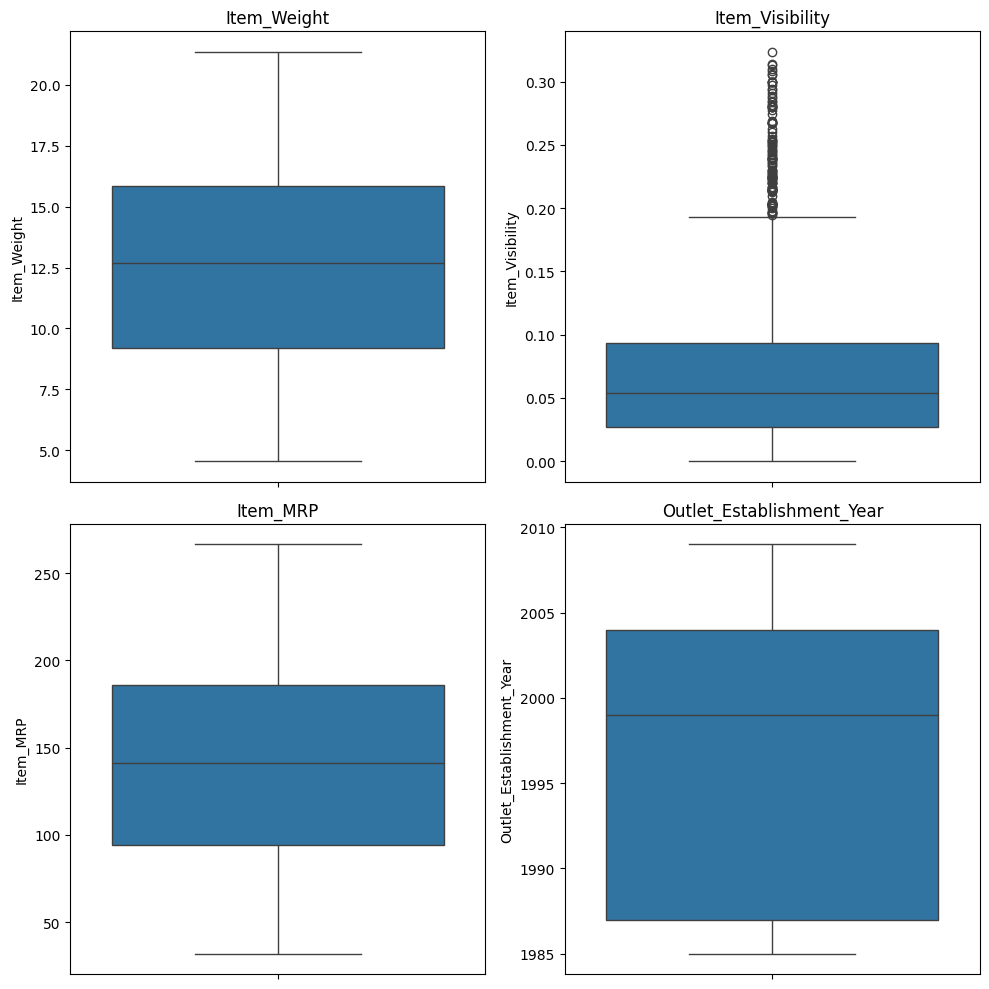

In [47]:
check_outlier(cont_df)

We see from out plots that it is only variable item visibility that has outliers

In [48]:
## We shall use the inter quantile method to deal with the outliers in the variable item visibility

def deal_with_outliers(data):
    for col in data.columns:
        # sett quantiles
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        ## Calculate the IQR
        IQR = Q3 -Q1
        
        # Setting the boundaries
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        ## Dealing with the outliers
        data[col] = np.where(data[col] <= lower_bound,lower_bound,data[col])
        data[col] = np.where(data[col] >= upper_bound,upper_bound,data[col])

In [49]:
## We run the function on our continuous data called cont_df
deal_with_outliers(cont_df)

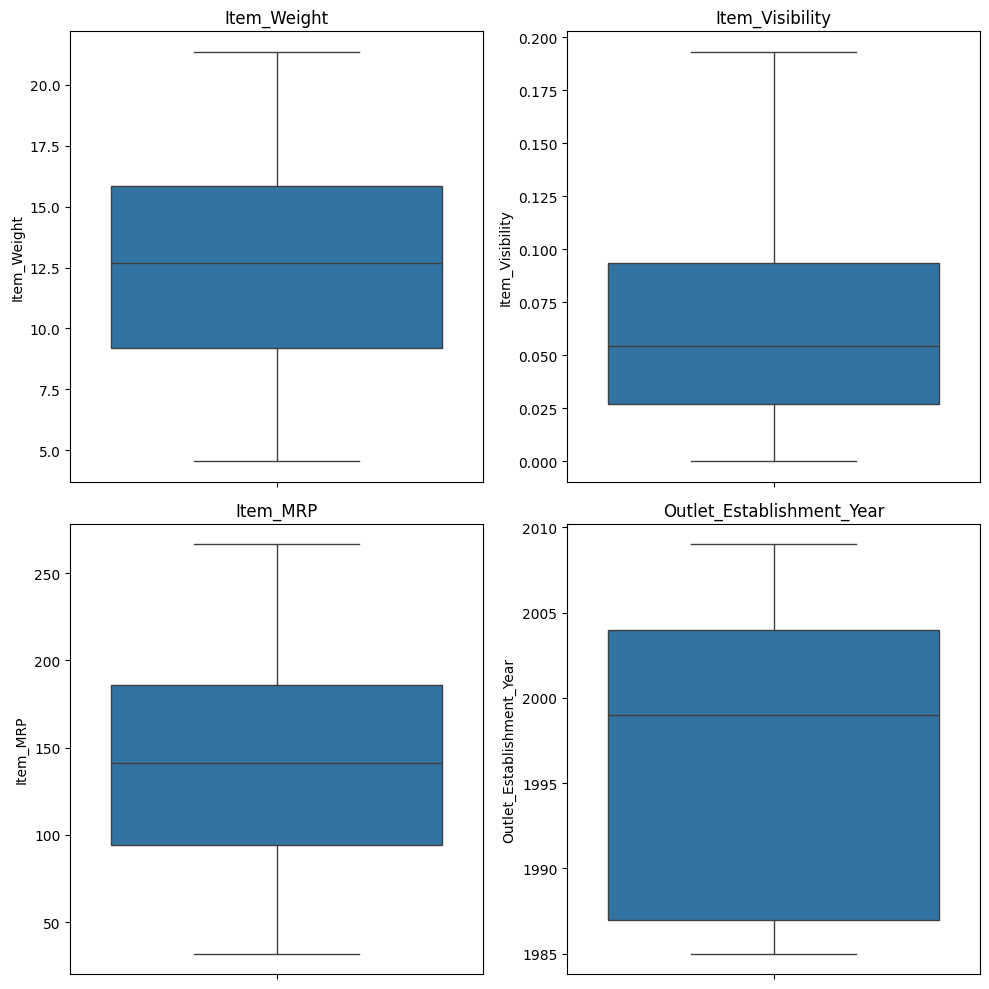

In [50]:
# I then check by visualization to see if the outliers in item visibility has been delt with
check_outlier(cont_df)